In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sea
import os
from sklearn.preprocessing import LabelEncoder

In [4]:
train=pd.read_csv("tested3.csv")

In [5]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory Data Analysis by checking out missing data

In [10]:
train.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Text(0.5, 1.0, 'Sepal length')

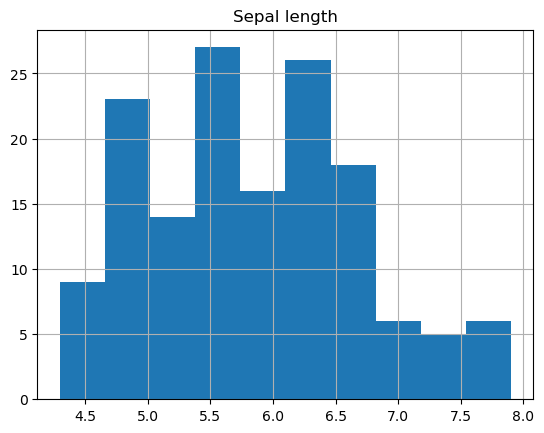

In [20]:
train["sepal_length"].hist()
pt.title("Sepal length")




Text(0.5, 1.0, 'Sepal Width')

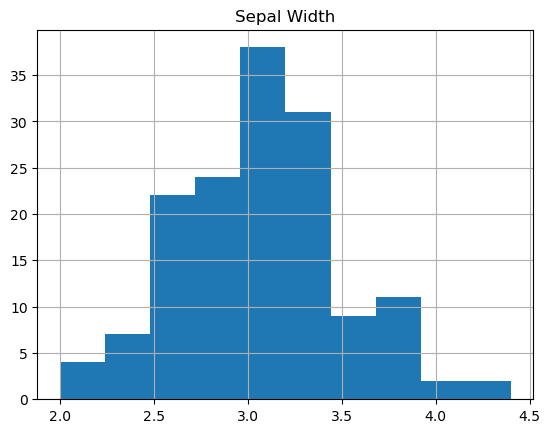

In [17]:
train["sepal_width"].hist()
pt.title("Sepal Width")

Text(0.5, 1.0, 'Petal length')

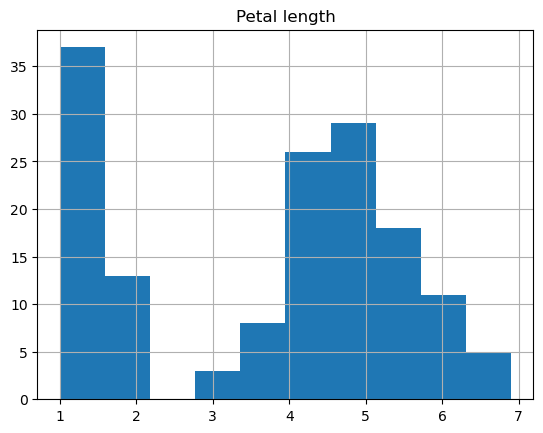

In [18]:
train["petal_length"].hist()
pt.title("Petal length")

Text(0.5, 1.0, 'Petal Width')

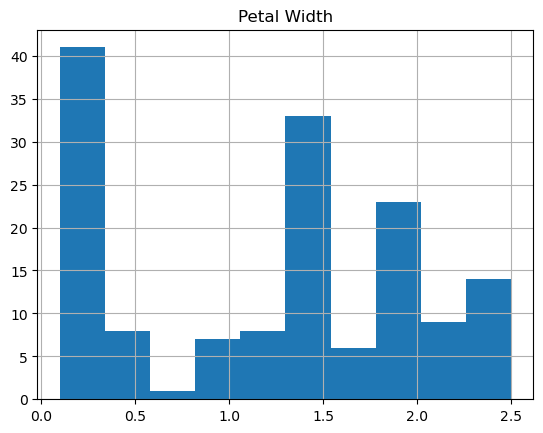

In [19]:
train["petal_width"].hist()
pt.title("Petal Width")


Text(0, 0.5, 'sepal_width')

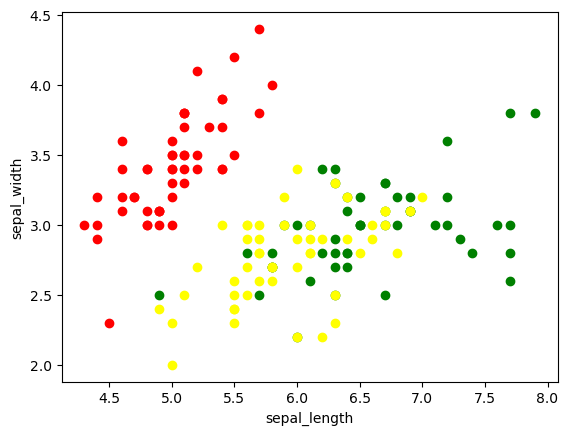

In [29]:
C = ["green", "yellow", "red"]

Species = ["Iris-virginica", "Iris-versicolor", "Iris-setosa"]

for i in range(3):
    a=train[train["species"]==Species[i]]
    pt.scatter(a["sepal_length"], a["sepal_width"], c = C[i], label=Species[i])
pt.xlabel("sepal_length")
pt.ylabel("sepal_width")


Text(0, 0.5, 'petal_width')

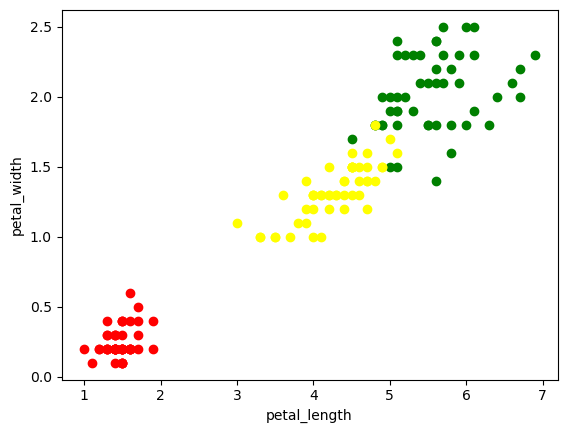

In [30]:
for i in range(3):
    a=train[train["species"]==Species[i]]
    pt.scatter(a["petal_length"], a["petal_width"], c = C[i], label=Species[i])
pt.xlabel("petal_length")
pt.ylabel("petal_width")

Text(0, 0.5, 'petal_length')

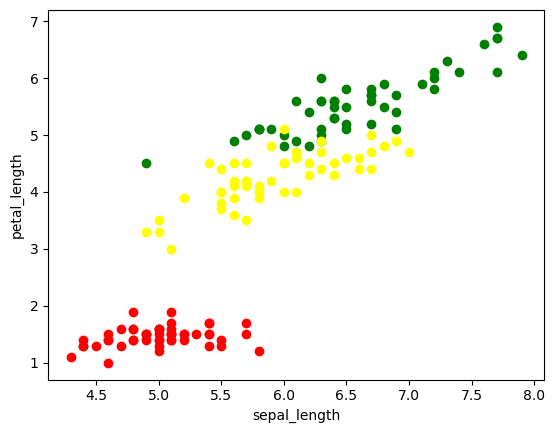

In [31]:
for i in range(3):
    a=train[train["species"]==Species[i]]
    pt.scatter(a["sepal_length"], a["petal_length"], c = C[i], label=Species[i])
pt.xlabel("sepal_length")
pt.ylabel("petal_length")

Text(0, 0.5, 'petal_width')

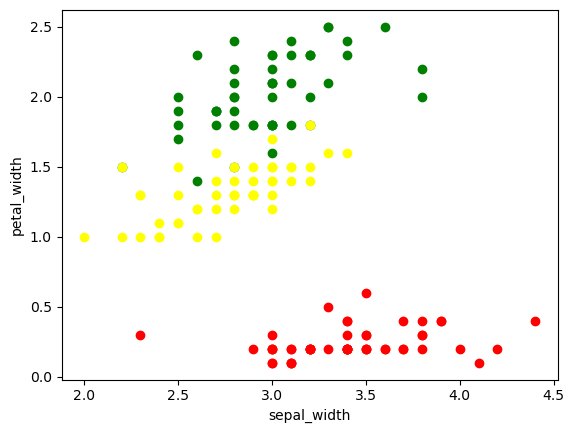

In [32]:
for i in range(3):
    a=train[train["species"]==Species[i]]
    pt.scatter(a["sepal_width"], a["petal_width"], c = C[i], label=Species[i])
pt.xlabel("sepal_width")
pt.ylabel("petal_width")

In [33]:
train.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_19828\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_19828\3785905095.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr()


<Axes: >

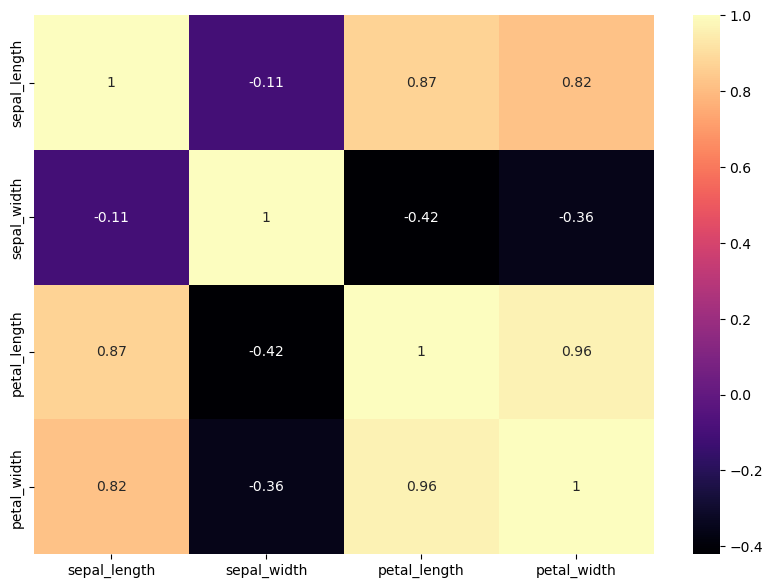

In [34]:
correlation = train.corr() 
fig, ax= pt.subplots(figsize=(10,7))
sea.heatmap(correlation, annot=True, cmap="magma")

In [36]:
l=LabelEncoder()

In [38]:
train["species"]=l.fit_transform(train["species"])
train.head()                                  

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Training And Prediction

In [40]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


In [41]:
X = train.drop(columns=["species"])

Y = train["species"]

x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.5)

In [43]:
Model=LogisticRegression()

In [44]:
Model.fit(x_train,y_train)

LogisticRegression()

In [45]:
print("ACCURACY: ",Model.score(x_test,y_test)*100)

ACCURACY:  96.0
